<a href="https://colab.research.google.com/github/raziesadri/MNIS-DeepLearning/blob/main/MNIST_FC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Fully Connected Model
The MNIST handwritten digit classification problem is a standard dataset used in computer vision and deep learning.
In this project we creat and test a deep learning model with sequential model and fully connected layers. 

## Imports

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.losses import categorical_crossentropy
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

## Plot Function

In [ ]:
#plotting
def plot_history(net_history):
    history = net_history.history
    import matplotlib.pyplot as plt
    losses = history['loss']
    val_losses = history['val_loss']
    accuracies = history['acc']
    val_accuracies = history['val_acc']
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(['loss', 'val_loss'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(['acc', 'val_acc'])

## Load Data
This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 

In [ ]:
#load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Data attributes
print("train_images dimentions: ", train_images.ndim)
print("train_images shape: ", train_images.shape)
print("train_images type: ", train_images.dtype)

11501568/11490434 [==============================] - 0s 0us/step
train_images dimentions:  3
train_images shape:  (60000, 28, 28)
train_images type:  uint8


## Data Pre Process

In [ ]:
#dimension reduction
x_train = train_images.reshape(60000, 784)
x_test = test_images.reshape(10000, 784)

#change the type from integer to float for normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalization
x_train /= 255
x_test/= 255

#label's one hot encoding 
from keras.utils import np_utils
y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Creat A Sequential Model

In [ ]:
MyModel = Sequential()

###Add Layers

In [ ]:
#input layer
MyModel.add(Dense(500, activation='relu', input_shape=(784,)))
#droupout layer
MyModel.add(Dropout(0.2))
MyModel.add(Dense(100, activation='relu'))
#droupout layer
MyModel.add(Dropout(0.2))
#output layer
MyModel.add(Dense(10, activation='softmax'))


### Model Summery

In [ ]:
MyModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


###Compile Model

In [ ]:
MyModel.compile(optimizer='SGD', loss=categorical_crossentropy, metrics=['acc'])

## Train Model

Epoch 1/20
375/375 [==============================] - 4s 8ms/step - loss: 1.2851 - acc: 0.6335 - val_loss: 0.6064 - val_acc: 0.8607
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.6291 - acc: 0.8183 - val_loss: 0.4115 - val_acc: 0.8940
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.5011 - acc: 0.8526 - val_loss: 0.3507 - val_acc: 0.9046
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 0.4381 - acc: 0.8721 - val_loss: 0.3149 - val_acc: 0.9120
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3983 - acc: 0.8847 - val_loss: 0.2919 - val_acc: 0.9161
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3687 - acc: 0.8930 - val_loss: 0.2733 - val_acc: 0.9206
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3452 - acc: 0.8991 - val_loss: 0.2577 - val_acc: 0.9265
Epoch 8/20
375/375 [==============================] - 3s 7ms/step - loss: 0.

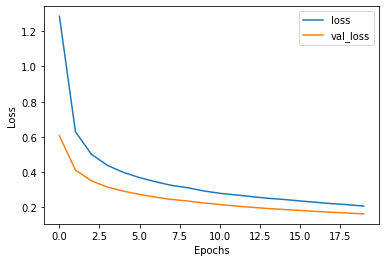

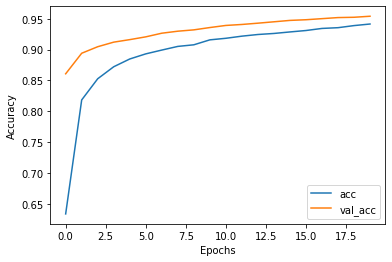

In [ ]:
network_history = MyModel.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2)
plot_history(network_history)

## Test Model

### Evaluation

In [ ]:
test_loss, test_acc = MyModel.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1624 - acc: 0.9527


### Predict

In [ ]:
test_labels_p = MyModel.predict(x_test)
test_labels_p = np.argmax(test_labels_p, axis=1)


[7 2 1 ... 4 5 6]


In [ ]:
y_test = np.argmax(y_test, axis=1)
print(y_test)

[7 2 1 ... 4 5 6]


### Confusion Matrix

In [ ]:
confusion_matrix(y_true=y_test, y_pred=test_labels_p)

array([[ 966,    0,    1,    0,    0,    3,    7,    1,    2,    0],
       [   0, 1115,    3,    2,    0,    1,    3,    2,    9,    0],
       [   9,    1,  972,    9,    6,    0,    9,    8,   14,    4],
       [   1,    1,   15,  959,    0,   11,    2,   10,    9,    2],
       [   1,    0,    4,    0,  940,    0,    8,    2,    4,   23],
       [  10,    1,    1,   18,    3,  829,   10,    1,   12,    7],
       [   9,    3,    1,    1,    9,    6,  925,    0,    4,    0],
       [   3,    9,   20,    6,    5,    0,    0,  966,    1,   18],
       [   4,    1,    5,   17,    5,    6,   10,    8,  912,    6],
       [   8,    6,    1,   10,   24,    4,    1,    7,    5,  943]])

###  Classification Report

In [ ]:
print(classification_report(y_test, test_labels_p))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.94      0.95      1032
           3       0.94      0.95      0.94      1010
           4       0.95      0.96      0.95       982
           5       0.96      0.93      0.95       892
           6       0.95      0.97      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.94      0.94       974
           9       0.94      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

